## Temporal Difference: SARSA without Pooling

SARSA 因为是同策略的，所以理论上不能池化

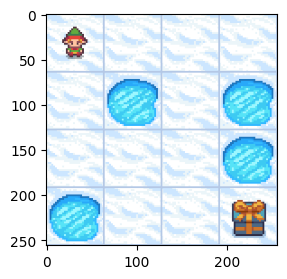

In [1]:
import gym

# define env
class MyWrapper(gym.Wrapper):
  def __init__(self):
    env = gym.make( 'FrozenLake-v1',
                    render_mode='rgb_array',
                    is_slippery=False)
    super().__init__(env)
    self.env = env
    
  def reset(self):
    state, _ = self.env.reset()
    return state
  
  def step(self, action):
    state, reward, terminated, truncated, info = self.env.step(action)
    over = terminated or truncated
    
    # 步进回馈为-1
    if not over:
      reward = -1
      
    # 掉坑里-100
    if over and reward == 0:
      reward = -100
      
    return state, reward, over
  
  # 打印游戏图像
  def show(self):
    from matplotlib import pyplot as plt
    plt.figure(figsize=(3, 3))
    plt.imshow(self.env.render())
    plt.show()
    
env = MyWrapper()
env.reset()
env.show()

In [2]:
import numpy as np

# init Q-table, 定义每个状态下每个动作的价值
Q = np.zeros((16, 4))

Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [3]:
from IPython import display
import random

# 玩一局并记录数据
def play(show=False):
  data = []
  reward_sum = 0
  
  state = env.reset()
  over = False
  while not over:
    action = Q[state].argmax()
    if random.random() < 0.1:
      action = env.action_space.sample()
      
    next_state, reward, over = env.step(action)
    data.append((state, action, reward, next_state, over))
    reward_sum += reward
    state = next_state
    
    if show:
      display.clear_output(wait=True)
      env.show()
      
  return data, reward_sum

play()[-1]

-130

In [4]:
# 数据池
# code change here

In [7]:
# 训练
def train():
  # 共更新N轮数据
  for epoch in range(2000):
    
    # new code begin here --------------------------
    # 玩一次游戏，并更新数据后，训练N次
    for (state, action, reward, next_state, over) in play()[0]:
      
      # Q矩阵兵甲当前state下action的价值
      value = Q[state, action]
    
      # 实际游戏后得到return
      target = reward + Q[next_state, Q[next_state].argmax()] * 0.9
      
      # TD error 修正
      update = (target - value) * 0.02
      # new code end here
      
      # 更新Q表格
      Q[state, action] += update
      
    if epoch % 100 == 0:
      print(epoch, play()[-1])
      
train()

0 -4.0
100 -4.0
200 -4.0
300 -102
400 -4.0
500 -5.0
600 -4.0
700 -4.0
800 -4.0
900 -6.0
1000 -4.0
1100 -102
1200 -6.0
1300 -7.0
1400 -6.0
1500 -6.0
1600 -4.0
1700 -4.0
1800 -4.0
1900 -4.0


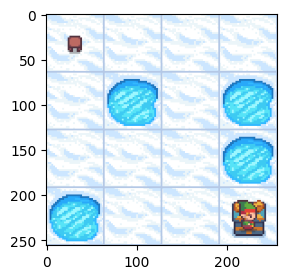

-4.0

In [8]:
play(True)[-1]